In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical Differentiantions

### 1. Forward Difference

$$ f'(x) = \frac{f(x+h) - f(x)}{h} + O(h) $$

### 2. Backward Difference

$$ f'(x) = \frac{f(x) - f(x-h)}{h} + O(h) $$

### 3. Central Difference

$$ f'(x) = \frac{f(x+h) - f(x-h)}{2h} + O(h^2) $$

### 4. Second derivative

$$ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + O(h^2) $$

Take h to be small and these formulas are accurate.

But don't go too small or you will get roundoff error.

### Example of Forward Difference

$$ f(x) = e^{2x} $$

$$h=10^{-8}$$



In [38]:
def fwd_diff(f, x, h):
    return (f(x+h) - f(x))/h

def bwd_diff(f, x, h):
    return (f(x) - f(x-h))/h

def ctr_diff(f, x, h):
    return (f(x+h) - f(x-h))/(2*h) 

print(fwd_diff(lambda x: np.exp(2*x), 2, 1e-8))
print(2*np.exp(2*2))

109.19630071271058
109.19630006628847


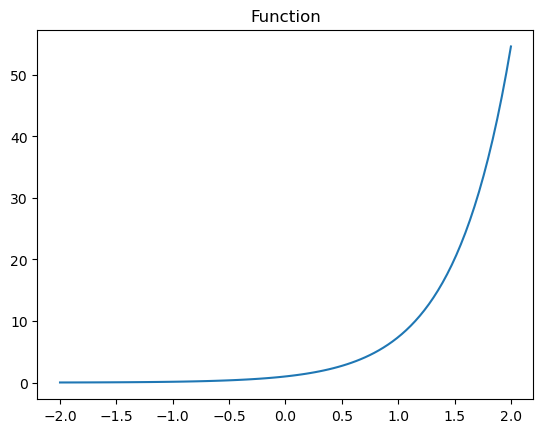

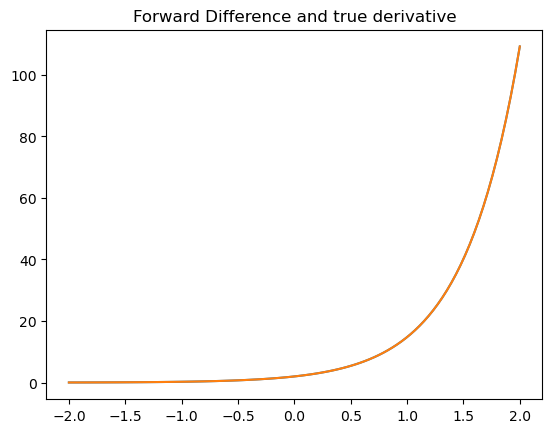

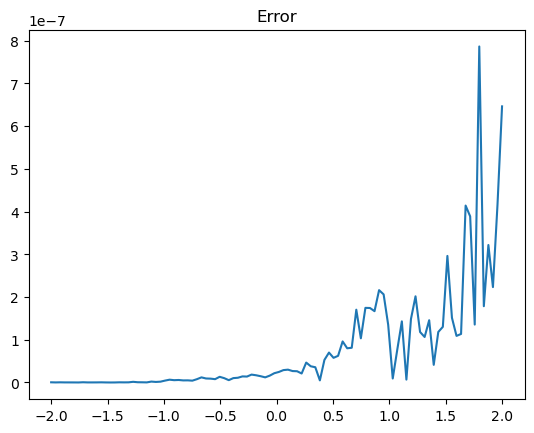

In [33]:
xs = np.linspace(-2,2, 100)
func = lambda x: np.exp(2*x)
plt.title("Function")
plt.plot(xs, func(xs))

plt.figure()
plt.title("Forward Difference and true derivative")
plt.plot(xs, fwd_diff(func, xs, 1e-8))
plt.plot(xs, 2*np.exp(2*xs))

plt.figure()
plt.title("Error")
plt.plot(xs, abs(fwd_diff(func, xs, 1e-8) - 2*np.exp(2*xs)))



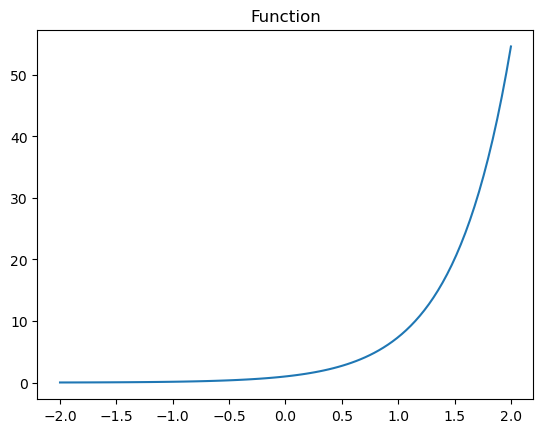

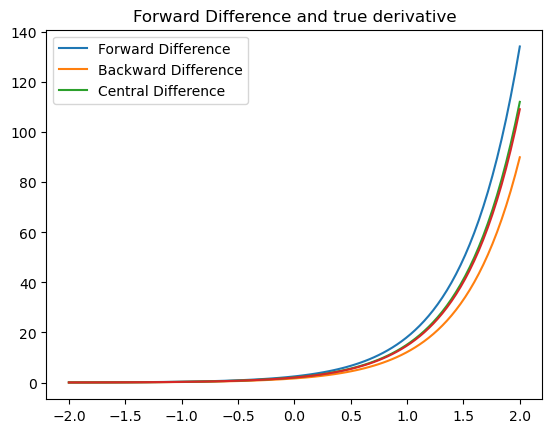

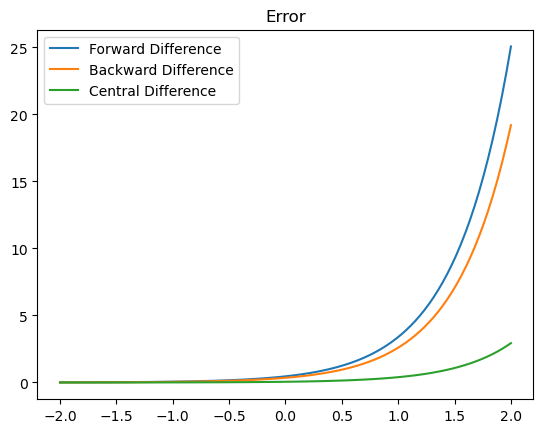

In [41]:
# same thing but h=0.2

xs = np.linspace(-2,2, 100)
func = lambda x: np.exp(2*x)
plt.title("Function")
plt.plot(xs, func(xs))

plt.figure()
plt.title("Forward Difference and true derivative")
plt.plot(xs, fwd_diff(func, xs, 0.2), label="Forward Difference")
plt.plot(xs, bwd_diff(func, xs, 0.2), label="Backward Difference")
plt.plot(xs, ctr_diff(func, xs, 0.2), label="Central Difference")
plt.plot(xs, 2*np.exp(2*xs))
plt.legend()
plt.figure()
plt.title("Error")
plt.plot(xs, abs(fwd_diff(func, xs, 0.2) - 2*np.exp(2*xs)), label="Forward Difference")
plt.plot(xs, abs(bwd_diff(func, xs, 0.2) - 2*np.exp(2*xs)), label="Backward Difference")
plt.plot(xs, abs(ctr_diff(func, xs, 0.2) - 2*np.exp(2*xs)), label="Central Difference")
plt.legend()

# Question from the lab

$$x_{n+1}=x_ne^{-x_n}$$ 

Find the initial condition that maximizes the fifth iterate of this sequence.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from functools import reduce

In [43]:
def n_compositions(f, n):
    '''
    Returns a function that computes the nth composition of f.
    '''
    
    if n == 0:
        # return identity function when n = 0. no compositions just returns the input.
        return lambda x: x

    return reduce(lambda f, g: lambda x: f(g(x)), [f] * n)

In [44]:
def rec(x):
    return x*np.exp(-x)

In [46]:
# check to make sure it's working as expected.

print(n_compositions(rec, 5)(1))
x0 = 1
for i in range(5):
    x0 = rec(x0)
print(x0)

0.13779845257830275
0.13779845257830275


In [47]:
# first try... doesn't work.
x0 = np.linspace(-100, 100, 100)
xs = [x0]
for i in range(5):
    xs.append(rec(xs[-1]))
xs = np.array(xs).T

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_30009/716587459.py:2: RuntimeWarning: overflow encountered in exp
  return x*np.exp(-x)


In [48]:
def fwd_diff(f, x, h=1e-8):
    return (f(x+h) - f(x)) / h

def ct_diff(f, x, h=1e-8):
    return (f(x+h) - f(x-h)) / (2*h)

In [50]:
# this is not what we want..

der = lambda x: n_compositions(rec, 5)(x)
fsolve(der, 0.4)

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_30009/716587459.py:2: RuntimeWarning: overflow encountered in exp
  return x*np.exp(-x)


array([0.4])

In [51]:
# with central difference
print(fsolve(lambda x: ct_diff(n_compositions(rec, 5), x), 3))

print(fsolve(lambda x: ct_diff(n_compositions(rec, 5), x), 0.4))

# print(fsolve(lambda x: ct_diff(n_compositions(rec, 5), x), 5))

[1.00000001]
[0.99999999]


In [52]:
#with fwd_diff

print(fsolve(lambda x: fwd_diff(n_compositions(rec, 5), x), 3))

# print(fsolve(lambda x: fwd_diff(n_compositions(rec, 5), x), 0.4))

# print(fsolve(lambda x: fwd_diff(n_compositions(rec, 5), x), 5))

[0.99999992]


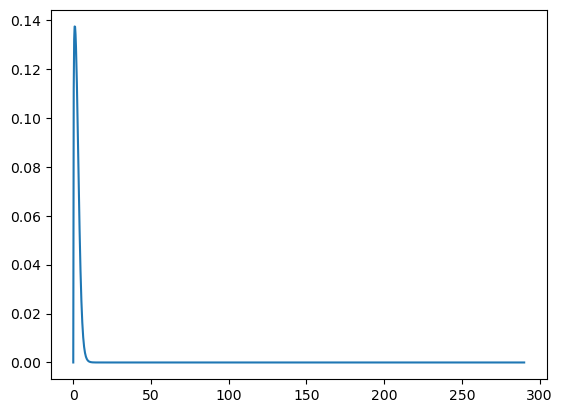

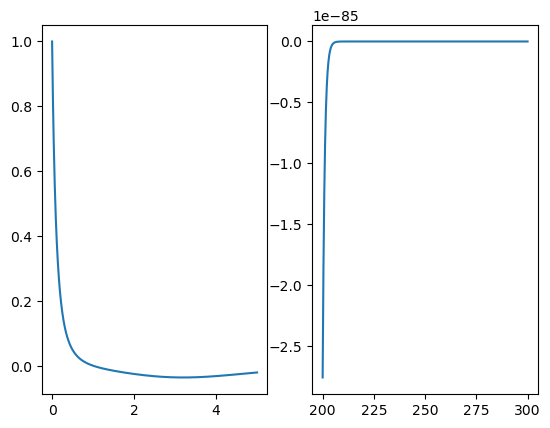

In [53]:
xs = np.linspace(0, 290, 1000)

plt.plot(xs, n_compositions(rec, 5)(xs))
plt.figure()
plt.subplot(1, 2, 1)
xs = np.linspace(0, 5, 1000)
plt.plot(xs, ct_diff(n_compositions(rec, 5), xs))
plt.subplot(1, 2, 2)
xs = np.linspace(200, 300, 1000)
plt.plot(xs, ct_diff(n_compositions(rec, 5), xs))

In [54]:
from scipy.optimize import root_scalar

root_scalar(lambda x: ct_diff(n_compositions(rec, 5), x), bracket=[0, 1])

      converged: True
           flag: 'converged'
 function_calls: 2
     iterations: 1
           root: 1.0

In [55]:
root_scalar(lambda x: ct_diff(n_compositions(rec, 5), x), bracket=[0, 10])

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 0.9999999936812929

In [56]:
root_scalar(lambda x: ct_diff(n_compositions(rec, 5), x), bracket=[0, 500])

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 15
           root: 0.9999999985423423